In [2]:
# Initial Set-Up
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from statistics import mean

In [3]:
diabetes_df = pd.read_csv("../wk_13_hmwk/diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Define variables
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

oversample = SMOTE (random_state = 42)
X_resampled, y_resampled = oversample.fit_resample(X_train_scaler, y_train)

model = tree.DecisionTreeClassifier(max_depth = 8,random_state=42, min_samples_split = 50, criterion = 'gini')

model = model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaler)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       150
           1       0.70      0.81      0.75        81

    accuracy                           0.81       231
   macro avg       0.80      0.81      0.80       231
weighted avg       0.82      0.81      0.82       231



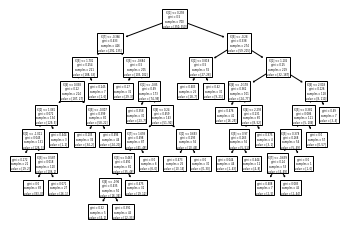

In [6]:
tree.plot_tree(model)
plt.savefig("tree.svg")
plt.show()

In [7]:
tree_10 = 

# Plot the decision tree model
fig = plt.figure(figsize=(30,30))

# Plot the decision tree
fig = tree.plot_tree(tree_10,
              filled=True)

# Save figure
plt.savefig("tree10.svg", dpi=200)

# Display figure
plt.show()


NameError: name 'tree_10' is not defined

<Figure size 2160x2160 with 0 Axes>

In [4]:
from xgboost import XGBClassifier